In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("slr.csv")


In [3]:
df.columns

Index(['kilometers_driven', 'selling_price'], dtype='object')

In [4]:
df['selling_price'].corr(df['kilometers_driven'])

0.9782416184887598

In [5]:
X = df[['kilometers_driven']]  # Make sure X is a 2D DataFrame
y = df['selling_price']  # y is a 1D Series

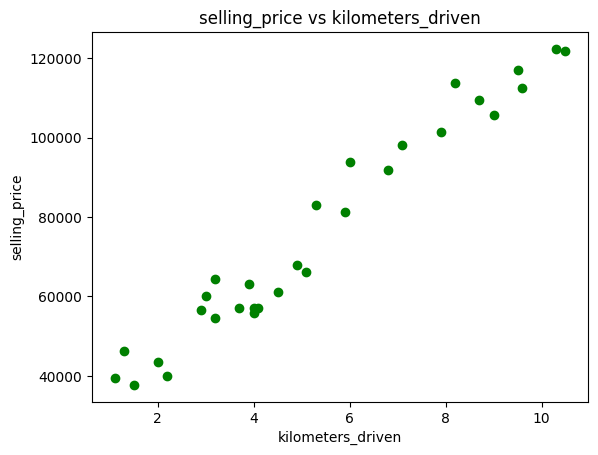

In [8]:
plt.scatter(X, y, color="green")
plt.title("selling_price vs kilometers_driven")
plt.xlabel("kilometers_driven")
plt.ylabel("selling_price")
plt.show()

In [9]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [10]:
#Step 2: Model Training (Fitting the Simple Linear Regression to Training Set)
from sklearn.linear_model import LinearRegression

# Create a linear regression object
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
#Step 3: Model Testing
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred})
print(df)

    Actual Values  Predicted Values
27         112635     115790.210113
15          67938      71498.278095
23         113812     102596.868661
17          83088      75267.804224
8           64445      55477.792045
9           57189      60189.699707


In [166]:
#Test with traing data set
y_pred = regressor.predict(X_train)
df = pd.DataFrame({'Real Values':y_train, 'Predicted Values':y_pred})
print(df)

    Real Values  Predicted Values
28       122391     122386.880839
24       109431     107308.776322
12        56957      63016.844304
0         39343      35687.779867
4         39891      46053.976722
16        66029      73383.041159
5         56642      52650.647449
13        57081      63959.225836
11        55794      63016.844304
22       101302      99769.724064
1         46205      37572.542932
2         37731      39457.305996
25       105582     110135.920919
3         43525      44169.213658
21        98273      92230.671805
26       116969     114847.828581
18        81363      80922.093418
29       121872     124271.643904
20        91738      89403.527208
7         54445      55477.792045
10        63218      62074.462772
14        61111      67728.751965
19        93940      81864.474950
6         60150      53593.028981


In [189]:
#Step 4: Model Evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# get the predicted values for test dat
y_pred = regressor.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print("rsme", rmse)
mae = mean_absolute_error(y_test, y_pred)
print("mae", mae)
r2 = r2_score(y_test, y_pred)
print("r2", r2)

rsme 7059.04362190151
mae 6286.453830757749
r2 0.9024461774180497


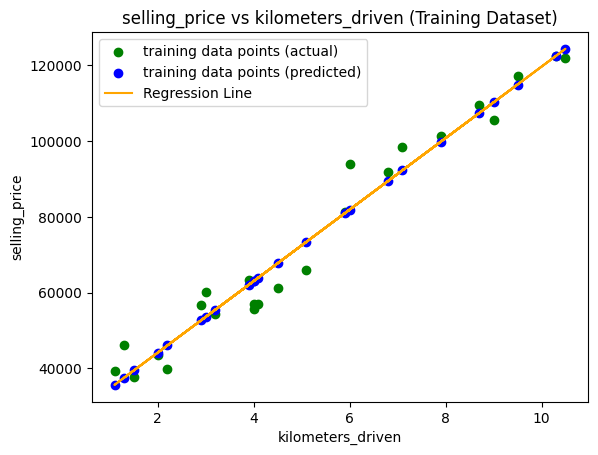

In [13]:
#Step 5: Visualize Training Set Results (with Regression Line)
y_pred = regressor.predict(X_train)
plt.scatter(X_train, y_train, color="green", label="training data points (actual)")
plt.scatter(X_train, y_pred, color="blue",label="training data points (predicted)")
plt.plot(X_train, y_pred, label='Regression Line', color='orange')
plt.title("selling_price vs kilometers_driven (Training Dataset)")
plt.xlabel("kilometers_driven")
plt.ylabel("selling_price")
plt.legend()
plt.show()

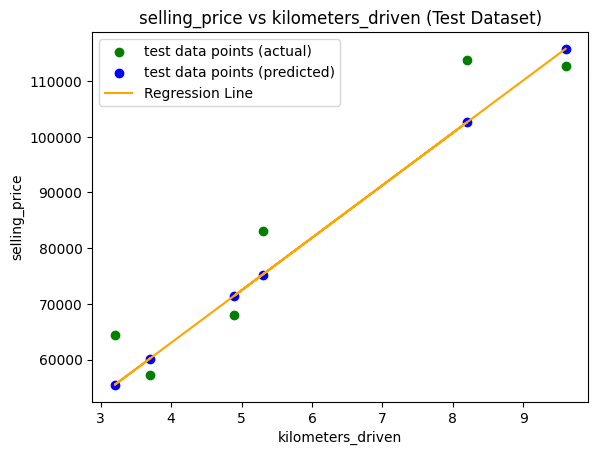

In [14]:
#Step 6: Visualize the Test Set Results (with Regression Line)

y_pred = regressor.predict(X_test)
plt.scatter(X_test, y_test, color="green", label="test data points (actual)")
plt.scatter(X_test, y_pred, color="blue",label="test data points (predicted)")
plt.plot(X_test, y_pred,label='Regression Line', color='orange')
plt.title("selling_price vs kilometers_driven (Test Dataset)")
plt.xlabel("kilometers_driven")
plt.ylabel("selling_price")
plt.legend()
plt.show()

In [15]:
print("coefficients: ", regressor.coef_)
print("intercept: ", regressor.intercept_)
print("n_features_in_: ", regressor.n_features_in_)

coefficients:  [9423.81532303]
intercept:  25321.583011776813
n_features_in_:  1


In [16]:
#Predict for new values
predicted_price = regressor.predict(pd.DataFrame({'kilometers_driven':[3.6,4.1]}))
print(predicted_price)

[59247.31817469 63959.2258362 ]
